In [1]:
def ldata(archive):
    f=open(archive)
    data=[]
    for line in f:
        line=line.strip()
        col=line.split()
        data.append(col)
    return data


In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

red_delfines=ldata("data/dolphins.gml")
genero=ldata("data/dolphinsGender.txt")

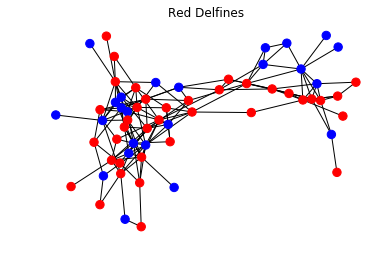

In [112]:
G=nx.read_gml("data/dolphins.gml")

options={'with_labels':False,
        'node_color':["blue" if g=="f" else "red" for n,g in genero],
        'font_weight':'bold',
        'node_size':70}

plt.title("Red Delfines")
#plt.subplot(221)
#nx.draw_random(G, **options)

#plt.subplot(222)
#nx.draw_circular(G, **options)

#plt.subplot(223)
#nx.draw_spectral(G, **options)

nx.draw(G,**options)


SyntaxError: invalid syntax (<ipython-input-102-c5a8f4cde179>, line 1)